#Data Preprocessing

###Will continue data preprocessing further from where we had left earlier (Laptop_preprocessing_2.ipynb and Laptop_HP_scraping.ipynb)

In [ ]:
# Importing dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

###Reading preprocessed dataframes and combining them for further preprocessing

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/nikhil-xyz/datasets/refs/heads/main/hp_laptops_cleaned.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/nikhil-xyz/datasets/refs/heads/main/set_df.csv')

In [ ]:
df1.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,HP,15.6,i5,8.0,4.2,Intel,512.0,51846.0
1,HP,15.6,i5,16.0,4.4,Intel,512.0,62499.0
2,HP,15.6,ryzen5,16.0,4.3,AMD,512.0,48999.0
3,HP,16.1,ryzen7,8.0,4.5,Nvidia,16.0,119999.0
4,HP,15.6,ryzen5,8.0,4.3,AMD,512.0,45999.0


In [ ]:
df1.shape

(244, 8)

In [ ]:
df2.head()

,Unnamed: 0,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,0,Microsoft,12.4,i5,4.0,3.9,Intel,256.0,29519.18
1,1,HP,34.0,i7,32.0,4.4,Nvidia,512.0,177694.00
2,2,Dell,15.6,i5,16.0,4.3,Intel,256.0,67076.00
3,3,MSI,15.6,ryzen5,16.0,4.5,AMD,512.0,57318.00
4,4,MSI,17.3,i9,64.0,5.0,Nvidia,2048.0,200899.18


In [ ]:
df2.shape

(1807, 9)

In [ ]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df2.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,Microsoft,12.4,i5,4.0,3.9,Intel,256.0,29519.18
1,HP,34.0,i7,32.0,4.4,Nvidia,512.0,177694.00
2,Dell,15.6,i5,16.0,4.3,Intel,256.0,67076.00
3,MSI,15.6,ryzen5,16.0,4.5,AMD,512.0,57318.00
4,MSI,17.3,i9,64.0,5.0,Nvidia,2048.0,200899.18


In [ ]:
df1.columns

Index(['Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Rating', 'Graphics',
       'Disk_size', 'Price'],
      dtype='object')

In [ ]:
df2.columns

Index(['Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Rating', 'Graphics',
       'Disk_size', 'Price'],
      dtype='object')

###Combining both dataframes

In [ ]:
# Combining dataframes
df = pd.concat([df1, df2], axis=0)

In [ ]:
df.shape

(2051, 8)

In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,HP,15.6,i5,8.0,4.2,Intel,512.0,51846.0
1,HP,15.6,i5,16.0,4.4,Intel,512.0,62499.0
2,HP,15.6,ryzen5,16.0,4.3,AMD,512.0,48999.0
3,HP,16.1,ryzen7,8.0,4.5,Nvidia,16.0,119999.0
4,HP,15.6,ryzen5,8.0,4.3,AMD,512.0,45999.0


In [ ]:
# Removing duplicate entries
df.drop_duplicates(inplace=True)
df.shape

(1715, 8)

###For the further preprocessing, we will transform all the categorical column values into lower case

In [ ]:
# Select columns with string values
str_cols = df.select_dtypes(include='object').columns

# Convert values to lowercase
df[str_cols] = df[str_cols].apply(lambda x: x.str.lower())

In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,hp,15.6,i5,8.0,4.2,intel,512.0,51846.0
1,hp,15.6,i5,16.0,4.4,intel,512.0,62499.0
2,hp,15.6,ryzen5,16.0,4.3,amd,512.0,48999.0
3,hp,16.1,ryzen7,8.0,4.5,nvidia,16.0,119999.0
4,hp,15.6,ryzen5,8.0,4.3,amd,512.0,45999.0


###**Observations and Outlier Removal for the Price feature**

<Axes: xlabel='Price', ylabel='Density'>

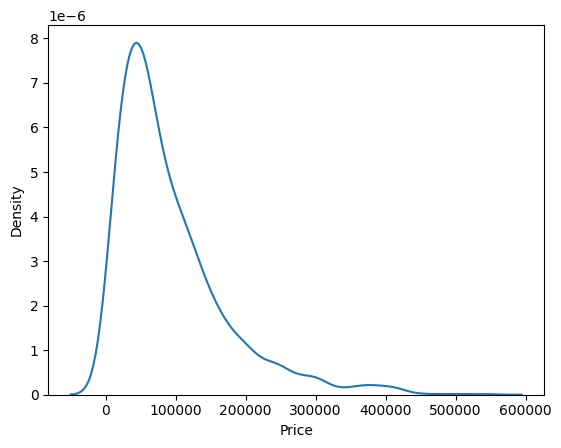

In [ ]:
sns.kdeplot(df.Price)

In [ ]:
df[df.Price > 300000].shape

(50, 8)

- It is less likely to laptop to have Price geeater than ₹300000.
- Also, dataset don't have many such rows containing higher Price.
- We will drop such rows assuming them as an outliers.

In [ ]:
price_outliers = df[df.Price > 300000]  # selecting rows
df.drop(price_outliers.index, axis=0, inplace=True) # removing rows

In [ ]:
df[df.Price > 300000].shape

(0, 8)

<Axes: xlabel='Price', ylabel='Density'>

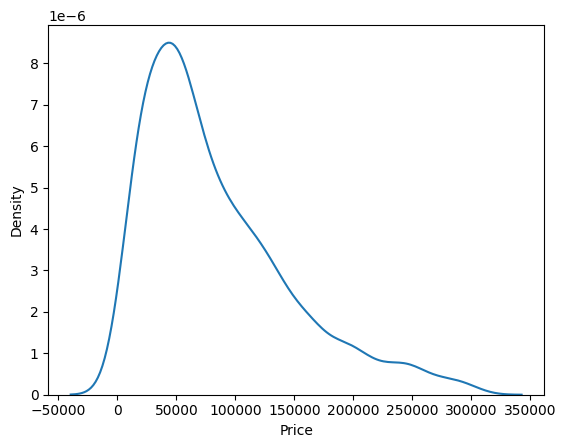

In [ ]:
sns.kdeplot(df.Price)

In [ ]:
df.columns

Index(['Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Rating', 'Graphics',
       'Disk_size', 'Price'],
      dtype='object')

In [ ]:
df.rename(columns={'Disk_size':'Disk_Size'}, inplace=True)

In [ ]:
df.columns

Index(['Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Rating', 'Graphics',
       'Disk_Size', 'Price'],
      dtype='object')

###**Observations and Preprocessing for Rating feature**

<Axes: xlabel='Rating', ylabel='Density'>

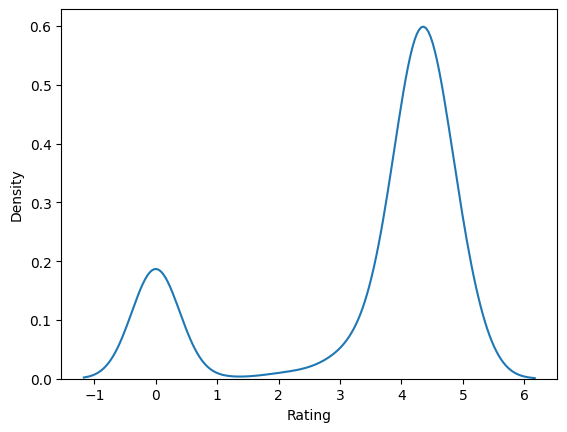

In [ ]:
sns.kdeplot(df.Rating)

###**Insights**
- Big chunk of Laptops don't have any rating assigned.
- We will replace those missing ratings with mean rating of Brand.
###**Strategy**
- Seperating out entries with and without ratings and storing them into different dataframes.
- Calculating mean rating for each Brand for dataframe with no missing ratings.
- Replacing empty ratings from the dataframe with missing ratings as per Brand name.

In [ ]:
# Seprating rows with and without rating and storing inside new dataframes
without_rating = df[df.Rating == 0]
with_rating = df[df.Rating != 0]

In [ ]:
without_rating.shape, with_rating.shape

((300, 8), (1343, 8))

In [ ]:
# Calculating mean rating for each Brand
mean_ratings = with_rating.groupby('Brand')['Rating'].mean()
mean_ratings

,Rating
Brand,
acer,4.332796
alienware,4.069091
asus,4.279167
chuwi,4.050000
dell,4.227273
excaliberpc,4.473684
gigabyte,3.495238
hp,4.350696
lenovo,4.352381


In [ ]:
# Fill missing ratings in 'without_rating'
for brand in without_rating['Brand'].unique():
    if brand in mean_ratings.index:
        without_rating.loc[without_rating['Brand'] == brand, 'Rating'] = mean_ratings[brand]

In [ ]:
without_rating.Rating.unique()

array([4.35069638, 4.47368421, 4.34537037, 3.53846154, 3.73333333,
       4.3327957 , 4.27916667, 4.26923077, 4.16052632, 3.4952381 ,
       4.06909091, 4.22727273, 4.2452381 , 4.26862745])

In [ ]:
# Combining Dataframes
df = pd.concat([without_rating, with_rating], axis=0)

In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
16,hp,15.6,i5,16.0,4.350696,intel,512.0,69999.0
18,hp,15.6,i5,8.0,4.350696,intel,512.0,66999.0
63,hp,14.0,i3,8.0,4.350696,intel,512.0,66999.0
65,hp,16.0,ultra7,32.0,4.350696,intel,1024.0,149999.0
70,hp,14.0,ultra7,16.0,4.350696,intel,512.0,115999.0


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
0,hp,15.6,i5,16.0,4.350696,intel,512.0,69999.0
1,hp,15.6,i5,8.0,4.350696,intel,512.0,66999.0
2,hp,14.0,i3,8.0,4.350696,intel,512.0,66999.0
3,hp,16.0,ultra7,32.0,4.350696,intel,1024.0,149999.0
4,hp,14.0,ultra7,16.0,4.350696,intel,512.0,115999.0


<Axes: xlabel='Rating', ylabel='Density'>

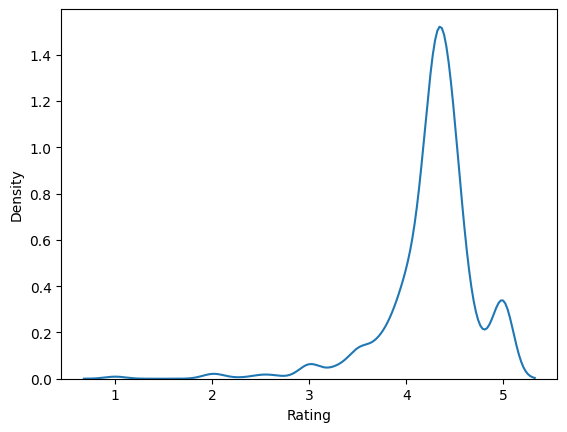

In [ ]:
sns.kdeplot(df.Rating)

###**Outlier Removal for the CPU_Model feature**

In [ ]:
df.groupby('Brand')['Price'].mean()

,Price
Brand,
acer,51725.623429
alienware,161200.361290
asus,65740.858498
chuwi,22693.295000
dell,78717.456204
excaliberpc,169138.940000
gigabyte,154073.801600
hp,73039.443866
lenovo,33887.866667


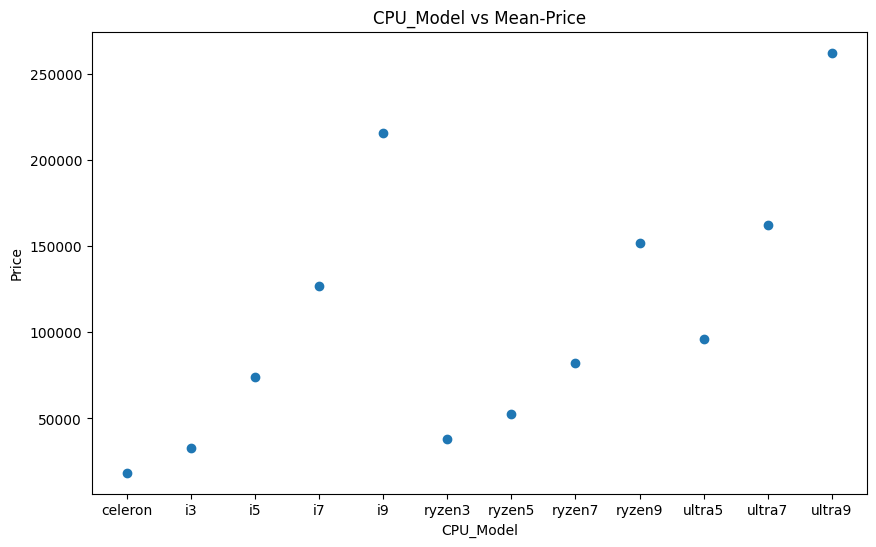

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.ylabel('Price')
    plt.xlabel('CPU_Model')
    plt.title('CPU_Model vs Mean-Price')
    plt.show()

temp_df = df.groupby('CPU_Model')['Price'].mean().reset_index()
scatter_plot(temp_df['CPU_Model'], temp_df['Price'])

###**Insights**
- Means for all the CPU_Models are consistent for a given Brand. Higher the model version of given series, higher the price.
- Now, we will ensure all the prices of given CPU_Model version number should be more than the mean of previous version number prices (Ex. all the 'i5' Laptops should have price more than the mean price of all 'i3' laptops and so on).
- All entries that don't qualify this criteria should be considered as an ouliers and hence removed.

In [ ]:
df[(df.Brand=='hp') & (df.CPU_Model=='i7')]['Price'].mean()

110456.7522222222

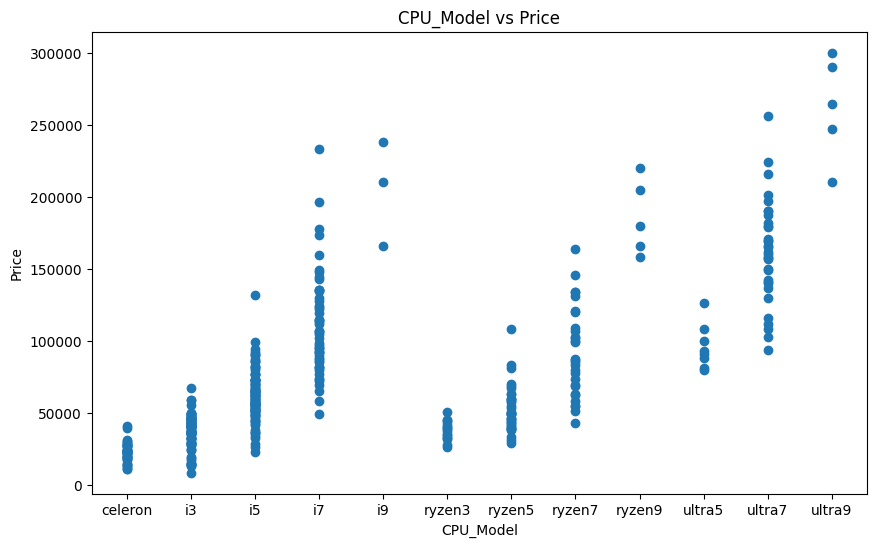

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.ylabel('Price')
    plt.xlabel('CPU_Model')
    plt.title('CPU_Model vs Price')
    plt.show()

temp_df = df[df.Brand == 'hp'].sort_values('CPU_Model') # Remove set_index and use sort_values instead
scatter_plot(temp_df['CPU_Model'], temp_df['Price'])

In [ ]:
df.shape

(1643, 8)

In [ ]:
df[df.Brand == 'hp'].groupby('CPU_Model')['Price'].mean().reset_index()

,CPU_Model,Price
0,celeron,22918.948780
1,i3,37125.771494
2,i5,62100.005149
3,i7,110456.752222
4,i9,204568.000000
5,ryzen3,37683.826250
6,ryzen5,52622.811351
7,ryzen7,92033.916552
8,ryzen9,185700.400000
9,ultra5,95874.000000


In [ ]:
def model_outliers(brand, mean_df):
  """
  Identifies and returns outliers based on CPU model pricing.

  Args:
    brand: The brand of laptops to analyze.
    mean_df: DataFrame containing mean prices for each CPU model of the given brand.

  Returns:
    A list of indexes representing outlier rows.
  """
  brand_df = df[df.Brand == brand]  # Select data for the specific brand
  indexes = []  # Initialize an empty list to store outlier indexes
  pattern_number = r'(\d)'  # Regular expression to extract number of CPU_Model (i7 --> 7)

  # Iterate over CPU models, comparing current model price to previous model mean
  for i in range(1, len(mean_df)):
    prev_model_mean = mean_df.loc[i-1, 'Price']  # Mean price of the previous CPU model
    curr_model = mean_df.loc[i, 'CPU_Model']  # Current CPU model
    prev_model = mean_df.loc[i-1, 'CPU_Model']  # Previous CPU model

    # Extract model numbers from CPU model names using regular expression
    current_model_number = re.findall(pattern_number, curr_model)
    previous_model_number = re.findall(pattern_number, prev_model)

    # Handle cases where model number is not found
    if current_model_number == []:
      current_model_number = [0]
    if previous_model_number == []:
      previous_model_number = [0]

    # Check if the difference between model numbers is 2 (e.g., i3 to i5)
    if int(current_model_number[0]) - int(previous_model_number[0]) == 2:
      current_model_prices = brand_df[brand_df.CPU_Model == curr_model]['Price']  # Prices of the current model

      # Identify outliers where the price is lower than the previous model's mean
      index_values = current_model_prices[current_model_prices < prev_model_mean].index
      indexes.extend(index_values)  # Add outlier indexes to the list

  return indexes  # Return the list of outlier indexes


In [ ]:
for brand in df.Brand.unique():
  mean_df = df[df.Brand == brand].groupby('CPU_Model')['Price'].mean().reset_index()
  indexes = model_outliers(brand, mean_df)
  df.drop(indexes, axis=0, inplace=True)
  df.reset_index(drop=True, inplace=True)

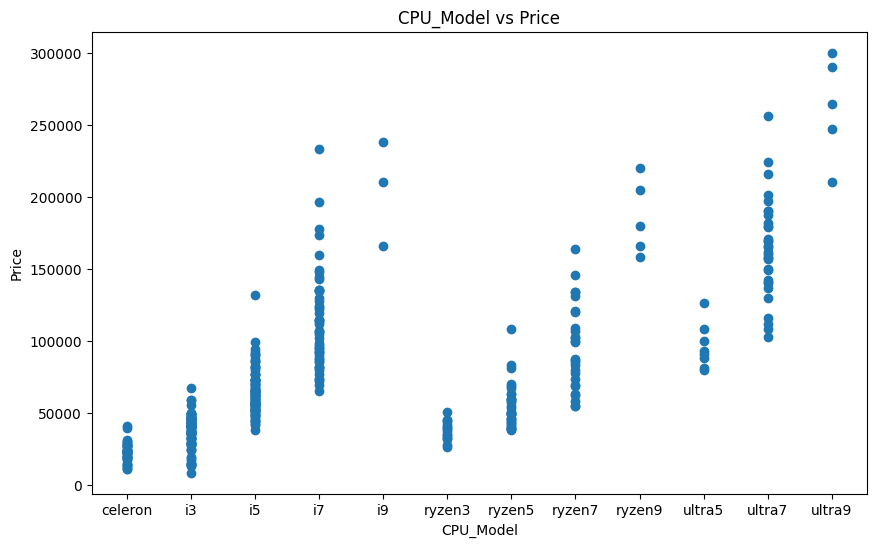

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.ylabel('Price')
    plt.xlabel('CPU_Model')
    plt.title('CPU_Model vs Price')
    plt.show()

temp_df = df[df.Brand == 'hp'].sort_values('CPU_Model')
scatter_plot(temp_df['CPU_Model'], temp_df['Price'])

In [ ]:
df.shape

(1535, 8)

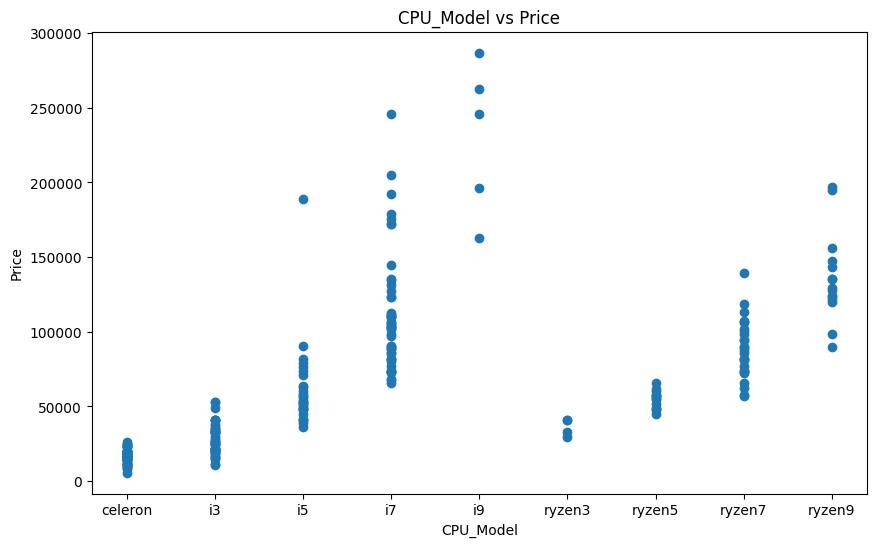

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.ylabel('Price')
    plt.xlabel('CPU_Model')
    plt.title('CPU_Model vs Price')
    plt.show()

temp_df = df[df.Brand == 'asus'].sort_values('CPU_Model')
scatter_plot(temp_df['CPU_Model'], temp_df['Price'])

In [ ]:
df.Brand.value_counts()

,count
Brand,
hp,403
asus,243
acer,187
msi,135
dell,130
samsung,84
alienware,62
excaliberpc,55
microsoft,54


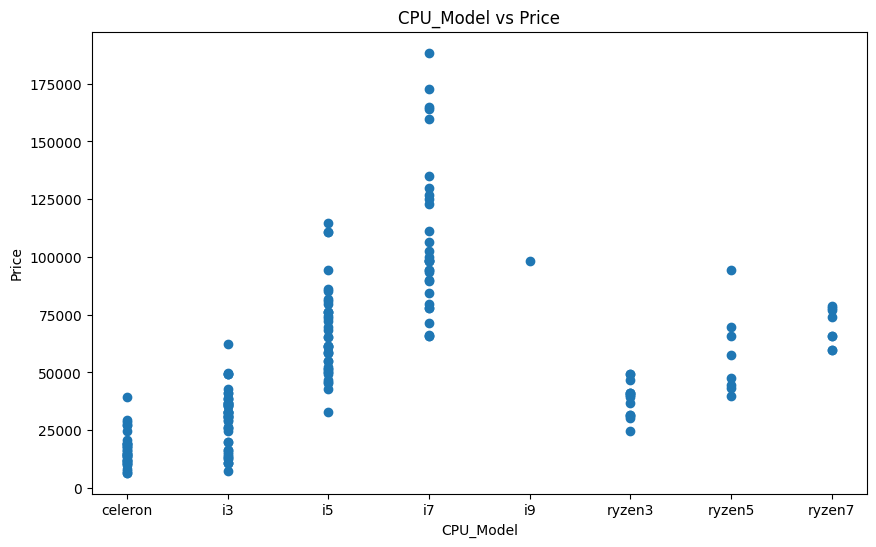

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.ylabel('Price')
    plt.xlabel('CPU_Model')
    plt.title('CPU_Model vs Price')
    plt.show()

temp_df = df[df.Brand == 'acer'].sort_values('CPU_Model') # Remove set_index and use sort_values instead
scatter_plot(temp_df['CPU_Model'], temp_df['Price'])

In [ ]:
df[(df.Brand == 'acer') & (df.CPU_Model == 'i7')]['Price'].mean()

108198.23290322583

In [ ]:
acer_index = df[(df.Brand == 'acer') & (df.CPU_Model == 'i9')].index

In [ ]:
df.drop(acer_index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

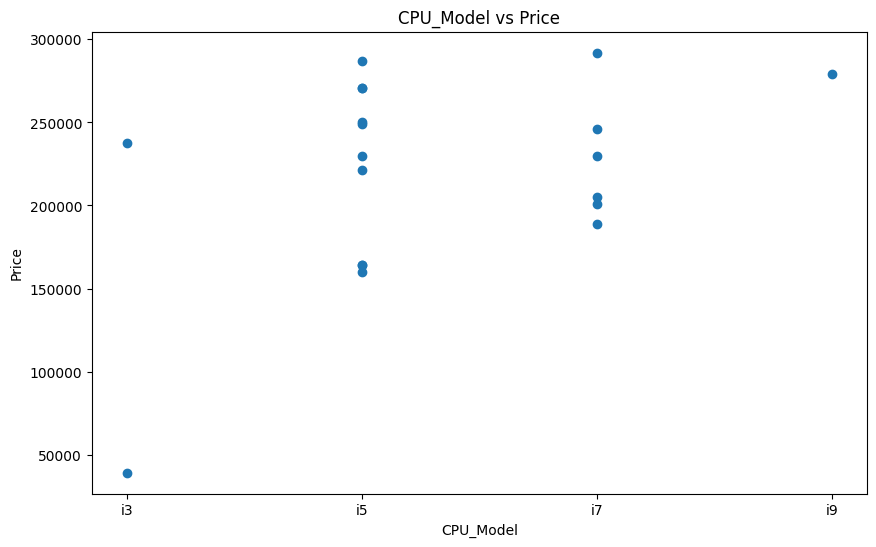

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.ylabel('Price')
    plt.xlabel('CPU_Model')
    plt.title('CPU_Model vs Price')
    plt.show()

temp_df = df[df.Brand == 'panasonic'].sort_values('CPU_Model') # Remove set_index and use sort_values instead
scatter_plot(temp_df['CPU_Model'], temp_df['Price'])

###**Observation**
- For i5, almost all the values ranging under the Price of 150000. Only few entries crossing this mark.
- Same conditions can be said for the ryzen5 with the Price of 85000.
- Such entries should also be considered as an outliers and removed.

In [ ]:
i5_r7_outlier_indexes = []
i5_idx = df[(df.CPU_Model == 'i5') & (df.Price > 150000)].index
i5_r7_outlier_indexes.extend(i5_idx)

In [ ]:
r7_idx = df[(df.CPU_Model == 'ryzen5') & (df.Price > 85000)].index
i5_r7_outlier_indexes.extend(r7_idx)

In [ ]:
df.drop(i5_r7_outlier_indexes, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(1508, 8)

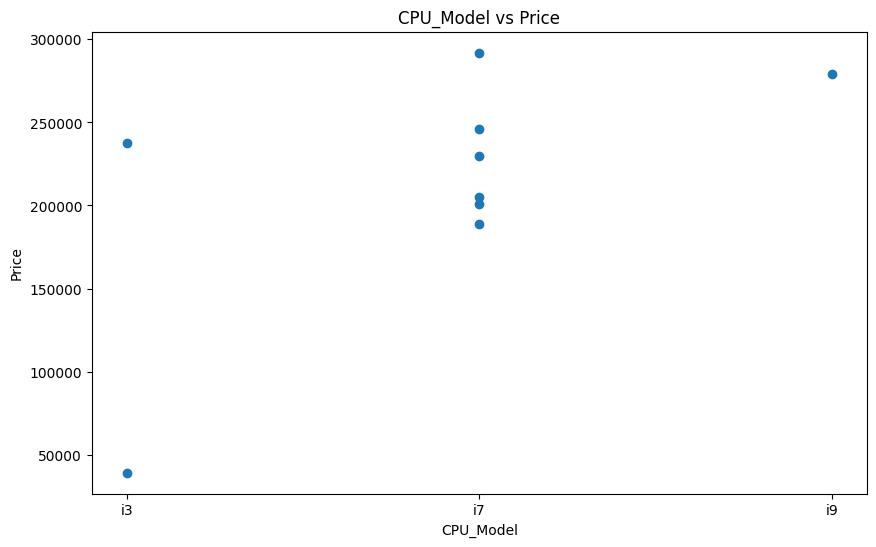

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.ylabel('Price')
    plt.xlabel('CPU_Model')
    plt.title('CPU_Model vs Price')
    plt.show()

temp_df = df[df.Brand == 'panasonic'].sort_values('CPU_Model') # Remove set_index and use sort_values instead
scatter_plot(temp_df['CPU_Model'], temp_df['Price'])

In [ ]:
df[(df.Brand == 'panasonic') & (df.CPU_Model == 'i3') & (df.Price > 100000)]

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
682,panasonic,13.1,i3,2.0,4.5,intel,320.0,237799.18


In [ ]:
pana_idx = df[(df.Brand == 'panasonic') & (df.CPU_Model == 'i3') & (df.Price > 100000)].index
df.drop(pana_idx, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(1507, 8)

In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
0,hp,15.6,i5,16.0,4.350696,intel,512.0,69999.0
1,hp,15.6,i5,8.0,4.350696,intel,512.0,66999.0
2,hp,14.0,i3,8.0,4.350696,intel,512.0,66999.0
3,hp,16.0,ultra7,32.0,4.350696,intel,1024.0,149999.0
4,hp,14.0,ultra7,16.0,4.350696,intel,512.0,115999.0


##Now, the dataset is ready for the model training.

In [ ]:
# df.to_csv('final_df.csv', index=False)